# Exercises for Bag of Words (BoW)


## Exercise 1: Basic Bag of Words Representation
### Problem: Write a Python script that manually creates a Bag of Words representation of a small set of sentences. Display the resulting vocabulary and the BoW representation for each sentence.

In [3]:
sentences = [
    "The cat sat on the mat.",
    "The dog barked at the cat.",
    "The bird flew over the cat and the dog."
]

# Step 1: Tokenize each sentence into words
tokenized_sentences = [sentence.lower().split() for sentence in sentences]

# Step 2: Create a vocabulary list
vocabulary = sorted(set(word for sentence in tokenized_sentences for word in sentence))

# Step 3: Create the Bag of Words representation
bow_representation = []
for sentence in tokenized_sentences:
    bow = [sentence.count(word) for word in vocabulary]
    bow_representation.append(bow)

# Display the results
print("Vocabulary:", vocabulary)
print("Bag of Words Representation:")
for i, bow in enumerate(bow_representation):
    print(f"Sentence {i + 1}: {bow}")

Vocabulary: ['and', 'at', 'barked', 'bird', 'cat', 'cat.', 'dog', 'dog.', 'flew', 'mat.', 'on', 'over', 'sat', 'the']
Bag of Words Representation:
Sentence 1: [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2]
Sentence 2: [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2]
Sentence 3: [1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 3]


## Exercise 2: Bag of Words with Stop Words Removal
### Problem: Modify the previous exercise to remove common English stop words from the vocabulary before creating the Bag of Words representation.

In [4]:
# Common stop words
stop_words = {"the", "on", "at", "and"}

# Step 1: Tokenize each sentence into words, removing stop words
tokenized_sentences = [[word for word in sentence.lower().split() if word not in stop_words] for sentence in sentences]

# Step 2: Create a vocabulary list
vocabulary = sorted(set(word for sentence in tokenized_sentences for word in sentence))

# Step 3: Create the Bag of Words representation
bow_representation = []
for sentence in tokenized_sentences:
    bow = [sentence.count(word) for word in vocabulary]
    bow_representation.append(bow)

# Display the results
print("Vocabulary:", vocabulary)
print("Bag of Words Representation:")
for i, bow in enumerate(bow_representation):
    print(f"Sentence {i + 1}: {bow}")

Vocabulary: ['barked', 'bird', 'cat', 'cat.', 'dog', 'dog.', 'flew', 'mat.', 'over', 'sat']
Bag of Words Representation:
Sentence 1: [0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
Sentence 2: [1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
Sentence 3: [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]


## Exercise 3: Counting Word Frequencies
### Problem: Write a script that counts the frequency of each word in the entire corpus and displays the word frequencies.Create a bar chart that visualizes the frequency of the top 5 words from the cleaned Bag of Words model.

Word Frequencies: {'the': 7, 'cat': 2, 'sat': 1, 'on': 1, 'mat.': 1, 'dog': 1, 'barked': 1, 'at': 1, 'cat.': 1, 'bird': 1, 'flew': 1, 'over': 1, 'and': 1, 'dog.': 1}


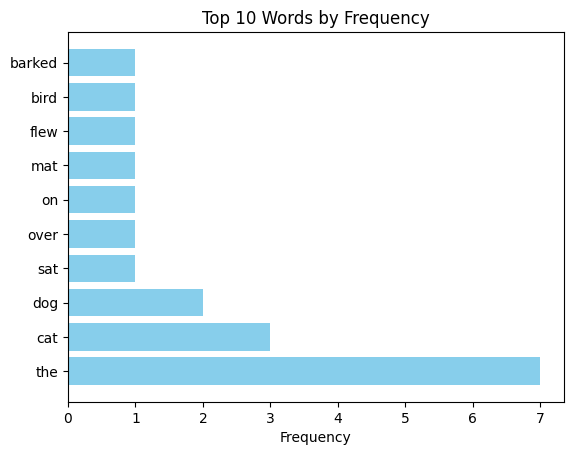

In [12]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
# Step 1: Tokenize each sentence into words
tokenized_sentences = [sentence.lower().split() for sentence in sentences]

# Step 2: Count the occurrences of each word
word_frequencies = {}
for sentence in tokenized_sentences:
    for word in sentence:
        if word not in word_frequencies:
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

# Display the word frequencies
print("Word Frequencies:", word_frequencies)

# Create the Bag of Words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

# Sum up the counts of each vocabulary word
word_freq = np.asarray(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

# Get the top 10 most frequent words
top_indices = word_freq.argsort()[-10:][::-1]
top_words = words[top_indices]
top_counts = word_freq[top_indices]

# Plot the bar chart
plt.barh(top_words, top_counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Words by Frequency')
plt.show()

# Exercises for TF-IDF

## Exercise 1: Basic TF-IDF Calculation
### Problem: Manually compute the TF-IDF score for each word in a small set of sentences. Assume that the inverse document frequency (IDF) is precomputed.

In [13]:
sentences = [
    "The cat sat on the mat.",
    "The dog barked at the cat.",
    "The bird flew over the cat and the dog."
]

# Precomputed IDF values (for simplicity, we'll assume these are given)
idf_values = {
    "the": 0.0,
    "cat": 0.3,
    "sat": 0.7,
    "on": 0.9,
    "mat": 1.0,
    "dog": 0.3,
    "barked": 1.0,
    "at": 0.9,
    "bird": 1.0,
    "flew": 1.0,
    "over": 1.0
}

# Step 1: Compute the term frequency (TF)
tf_values = []
for sentence in sentences:
    words = sentence.lower().split()
    tf = {}
    for word in words:
        tf[word] = words.count(word) / len(words)
    tf_values.append(tf)

# Step 2: Compute the TF-IDF by multiplying TF by IDF
tfidf_values = []
for tf in tf_values:
    tfidf = {word: tf[word] * idf_values[word] for word in tf if word in idf_values}
    tfidf_values.append(tfidf)

# Display the TF-IDF values
for i, tfidf in enumerate(tfidf_values):
    print(f"Sentence {i + 1} TF-IDF:", tfidf)

Sentence 1 TF-IDF: {'the': 0.0, 'cat': 0.049999999999999996, 'sat': 0.11666666666666665, 'on': 0.15}
Sentence 2 TF-IDF: {'the': 0.0, 'dog': 0.049999999999999996, 'barked': 0.16666666666666666, 'at': 0.15}
Sentence 3 TF-IDF: {'the': 0.0, 'bird': 0.1111111111111111, 'flew': 0.1111111111111111, 'over': 0.1111111111111111, 'cat': 0.03333333333333333}


## Exercise 2: Comparing Words Across Documents with TF-IDF
### Problem: Write a script that compares the TF-IDF values of the word "cat" across all documents in the small corpus provided.

In [14]:
sentences = [
    "The cat sat on the mat.",
    "The dog barked at the cat.",
    "The bird flew over the cat and the dog."
]

# Precomputed IDF value for "cat"
idf_cat = 0.3

# Step 1: Compute the term frequency (TF) for "cat"
tf_cat_values = []
for sentence in sentences:
    words = sentence.lower().split()
    tf_cat = words.count("cat") / len(words)
    tf_cat_values.append(tf_cat)

# Step 2: Compute the TF-IDF for "cat"
tfidf_cat_values = [tf * idf_cat for tf in tf_cat_values]

# Display the TF-IDF values for "cat"
print("TF-IDF for 'cat' across documents:", tfidf_cat_values)

TF-IDF for 'cat' across documents: [0.049999999999999996, 0.0, 0.03333333333333333]


## Exercise 3: Understanding the Impact of Word Frequency on TF-IDF
### Problem: Modify the sentences so that the word "dog" appears more frequently. Recompute the TF-IDF for "dog" and compare it with the previous value.

In [15]:
sentences = [
    "The dog sat on the mat with the dog.",
    "The dog barked at the cat.",
    "The bird flew over the dog and the cat."
]

# Precomputed IDF value for "dog"
idf_dog = 0.3

# Step 1: Compute the term frequency (TF) for "dog"
tf_dog_values = []
for sentence in sentences:
    words = sentence.lower().split()
    tf_dog = words.count("dog") / len(words)
    tf_dog_values.append(tf_dog)

# Step 2: Compute the TF-IDF for "dog"
tfidf_dog_values = [tf * idf_dog for tf in tf_dog_values]

# Display the TF-IDF values for "dog"
print("TF-IDF for 'dog' across modified documents:", tfidf_dog_values)

TF-IDF for 'dog' across modified documents: [0.03333333333333333, 0.049999999999999996, 0.03333333333333333]


## Exercise 4: Creating a Dictionary and Corpus
### Problem: Use Gensim to create a dictionary and Bag of Words corpus from a provided text. Display the dictionary.

In [17]:
from gensim import corpora

# Tokenize the sentences
tokenized_texts = [text.lower().split() for text in sentences]

# Create a dictionary
dictionary = corpora.Dictionary(tokenized_texts)

# Display the dictionary
print("Dictionary:", dictionary.token2id)

Dictionary: {'dog': 0, 'dog.': 1, 'mat': 2, 'on': 3, 'sat': 4, 'the': 5, 'with': 6, 'at': 7, 'barked': 8, 'cat.': 9, 'and': 10, 'bird': 11, 'flew': 12, 'over': 13}


## Exercise 5: Creating a Custom Corpus
### Problem: Create your own small text corpus with at least three different sentences and apply TF-IDF to this corpus.

In [19]:
from gensim import models
custom_texts = [
    "Artificial intelligence is transforming the world.",
    "Machine learning is a subset of AI.",
    "Deep learning models require large datasets."
]

# Tokenize the sentences
custom_tokenized_texts = [text.lower().split() for text in custom_texts]

# Create a dictionary and corpus
custom_dictionary = corpora.Dictionary(custom_tokenized_texts)
custom_corpus = [custom_dictionary.doc2bow(text) for text in custom_tokenized_texts]

# Create the TF-IDF model
custom_tfidf = models.TfidfModel(custom_corpus)

# Apply the TF-IDF model to the custom corpus
custom_corpus_tfidf = custom_tfidf[custom_corpus]

# Display the TF-IDF values
for doc in custom_corpus_tfidf:
    print(doc)

[(0, 0.44124367556640004), (1, 0.44124367556640004), (2, 0.16284991207632715), (3, 0.44124367556640004), (4, 0.44124367556640004), (5, 0.44124367556640004)]
[(2, 0.16073253746956623), (6, 0.4355066251613605), (7, 0.4355066251613605), (8, 0.16073253746956623), (9, 0.4355066251613605), (10, 0.4355066251613605), (11, 0.4355066251613605)]
[(8, 0.16284991207632715), (12, 0.44124367556640004), (13, 0.44124367556640004), (14, 0.44124367556640004), (15, 0.44124367556640004), (16, 0.44124367556640004)]
